# Performing Analysis of Meteorological Data

In [639]:
# Importing necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [640]:
# Importing the dataset and printing it's head

df=pd.read_csv(r"C:\Users\KIIT\Documents\001 Data Science\weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [641]:
# Describing the dataset

df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [642]:
# Eliminating unwanted columns from the dataset

df=df.drop(['Daily Summary',
            'Temperature (C)',
            'Wind Speed (km/h)',
            'Wind Bearing (degrees)',
            'Visibility (km)',
            'Pressure (millibars)',
            'Summary',
            'Precip Type',
            'Daily Summary'], axis=1)
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [643]:
# Checking irregularities in dataset

df.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

In [644]:
# Changing the Time Zone by converting it to +UTC

df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df=df.set_index('Formatted Date')
data=df[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
2006-05-01 00:00:00+00:00,15.539479,0.721801
2006-06-01 00:00:00+00:00,19.535965,0.747125
2006-07-01 00:00:00+00:00,23.595348,0.656304
2006-08-01 00:00:00+00:00,19.528241,0.760753


(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.]),
 <a list of 10 Text yticklabel objects>)

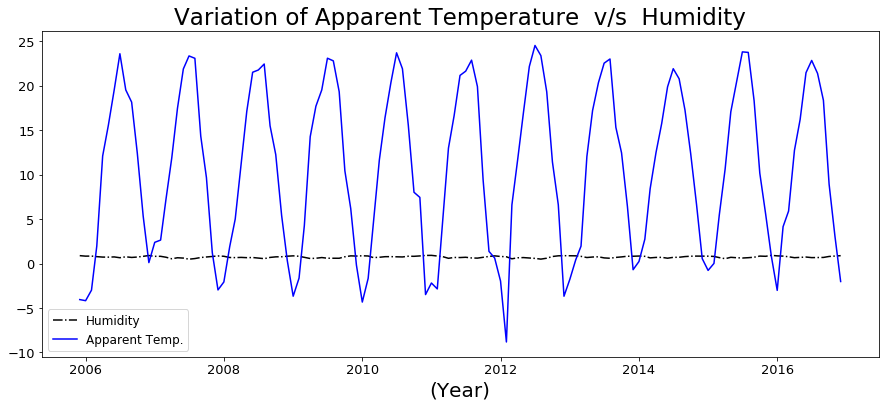

In [675]:
# Plotting the data set for the past ten years for all months.

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15,6))
plt.plot(data['Humidity'],label='Humidity',color='black',linestyle='dashdot')
plt.plot(data['Apparent Temperature (C)'],label='Apparent Temp.',color='blue')
plt.xlabel('(Year)', fontsize = 20);
plt.title('Variation of Apparent Temperature  v/s  Humidity',fontsize=23)
plt.legend(loc=0,fontsize=12)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

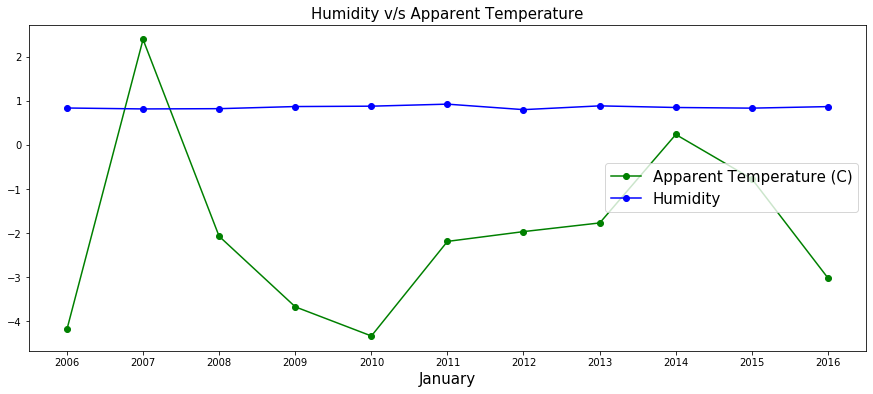

In [676]:
#JANUARY

jan = data[data.index.month==1]
plt.figure(figsize=(15,6))
plt.plot(jan.loc['2006-01-01':'2016-01-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(jan.loc['2006-01-01':'2016-01-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('January', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

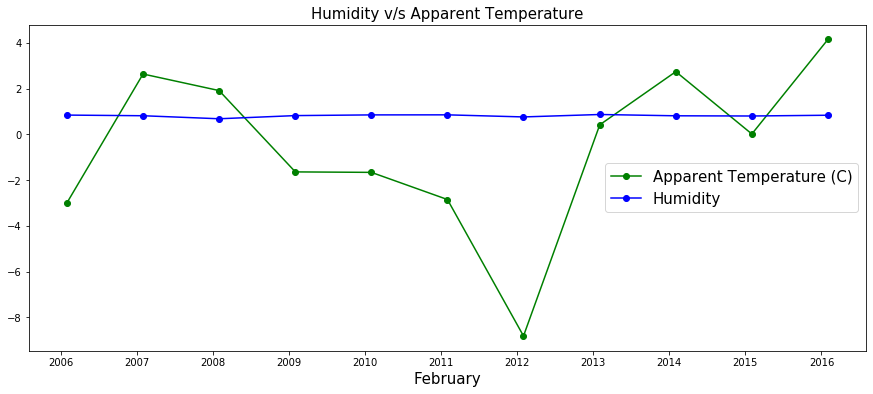

In [660]:
#FEBRUARY

feb = data[data.index.month==2]
plt.figure(figsize=(15,6))
plt.plot(feb.loc['2006-02-01':'2016-02-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(feb.loc['2006-02-01':'2016-02-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('February', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

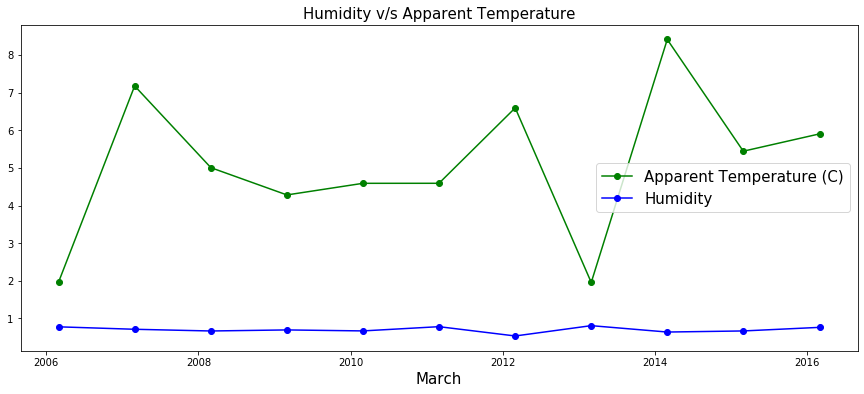

In [661]:
#MARCH

march = data[data.index.month==3]
plt.figure(figsize=(15,6))
plt.plot(march.loc['2006-03-01':'2016-03-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(march.loc['2006-03-01':'2016-03-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('March', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

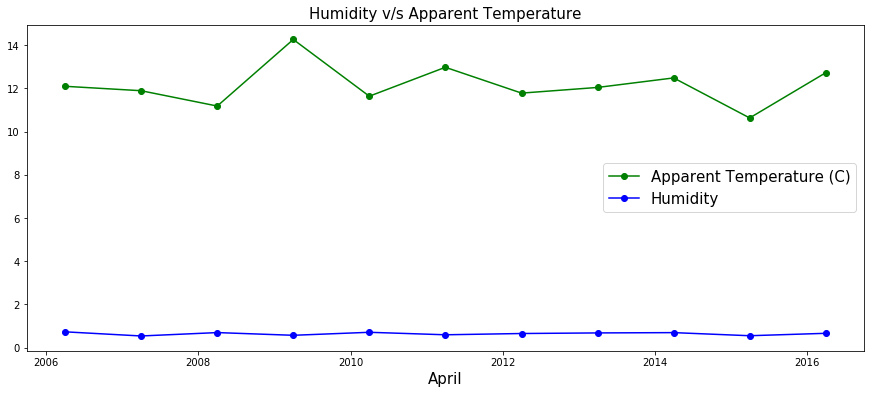

In [662]:
#APRIL

april=data[data.index.month==4]
plt.figure(figsize=(15,6))
plt.plot(april.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],
         marker='o',linestyle='-',label='Apparent Temperature (C)',color='green')
plt.plot(april.loc['2006-04-01':'2016-04-01','Humidity'],
         marker='o',linestyle='-',label='Humidity',color='blue')
plt.legend(loc='center right',fontsize=15)
plt.xlabel('April',fontsize=15)
plt.title('Humidity v/s Apparent Temperature',fontsize=15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

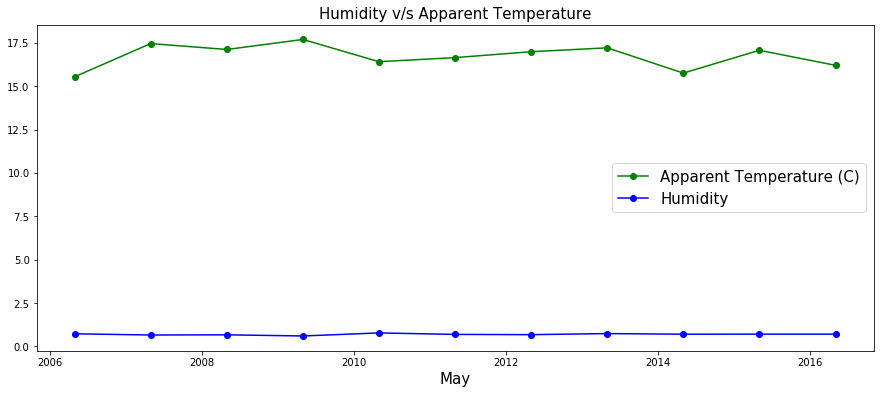

In [663]:
#MAY

may = data[data.index.month==5]
plt.figure(figsize=(15,6))
plt.plot(may.loc['2006-05-01':'2016-05-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(may.loc['2006-05-01':'2016-05-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('May', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

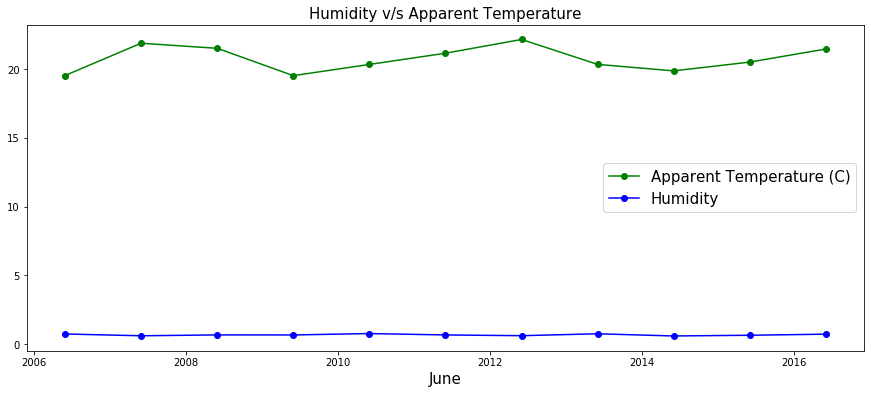

In [664]:
#JUNE

june = data[data.index.month==6]
plt.figure(figsize=(15,6))
plt.plot(june.loc['2006-06-01':'2016-06-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(june.loc['2006-06-01':'2016-06-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('June', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

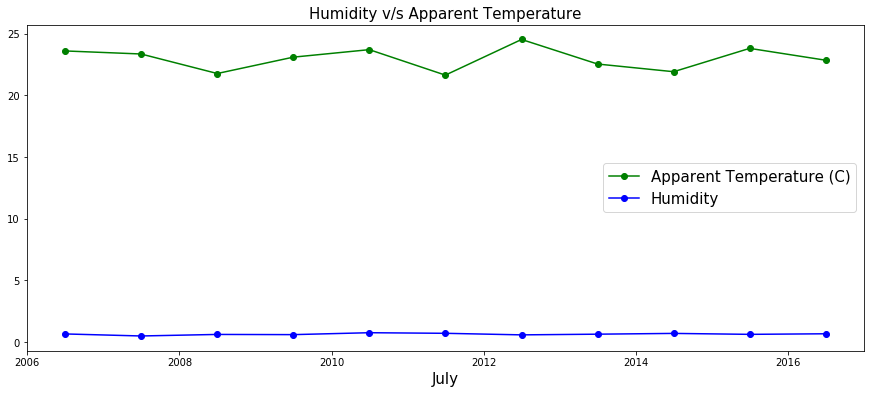

In [665]:
#JULY

july = data[data.index.month==7]
plt.figure(figsize=(15,6))
plt.plot(july.loc['2006-07-01':'2016-07-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(july.loc['2006-07-01':'2016-07-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('July', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

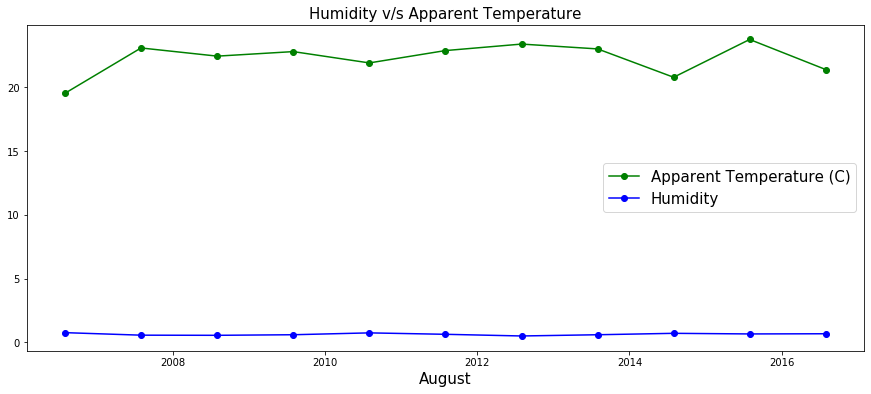

In [666]:
#AUGUST

aug = data[data.index.month==8]
plt.figure(figsize=(15,6))
plt.plot(aug.loc['2006-08-01':'2016-08-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(aug.loc['2006-08-01':'2016-08-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('August', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

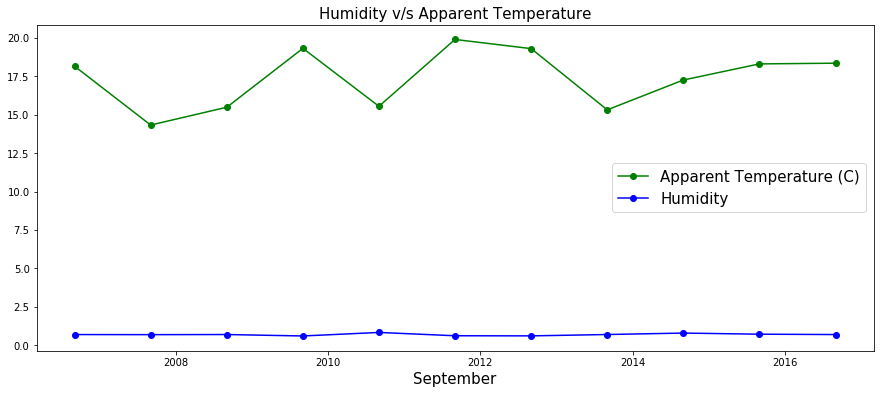

In [667]:
#SEPTEMBER

sept = data[data.index.month==9]
plt.figure(figsize=(15,6))
plt.plot(sept.loc['2006-09-01':'2016-09-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(sept.loc['2006-09-01':'2016-09-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('September', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

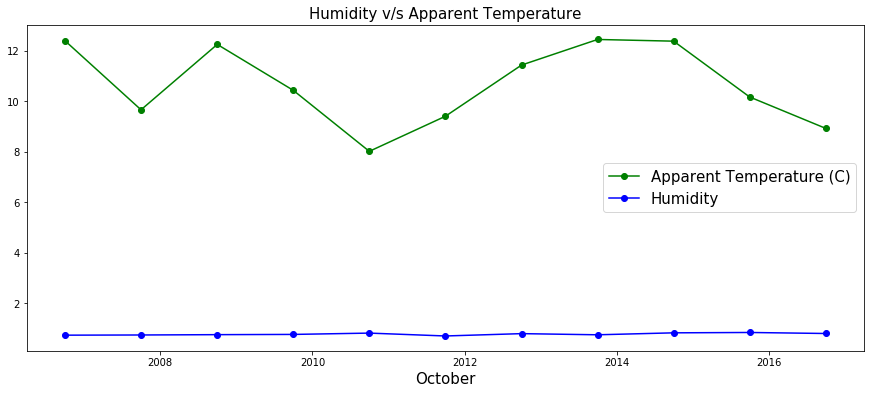

In [668]:
#OCTOBER

octo = data[data.index.month==10]
plt.figure(figsize=(15,6))
plt.plot(octo.loc['2006-10-01':'2016-10-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(octo.loc['2006-10-01':'2016-10-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('October', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

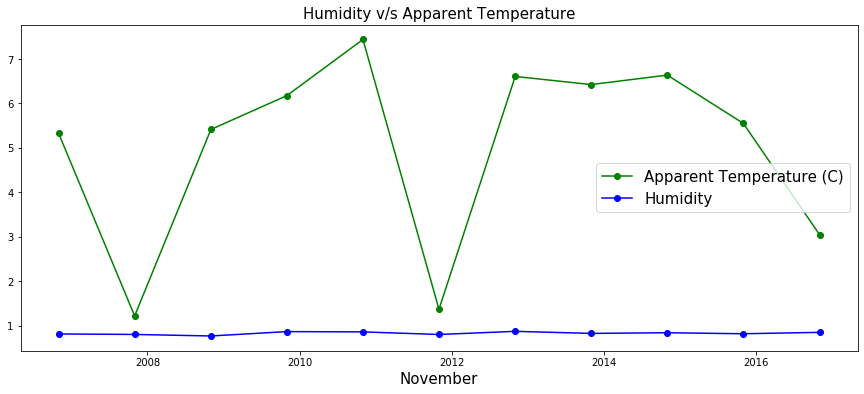

In [669]:
#NOVEMBER

nov= data[data.index.month==11]
plt.figure(figsize=(15,6))
plt.plot(nov.loc['2006-11-01':'2016-11-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(nov.loc['2006-11-01':'2016-11-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('November', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

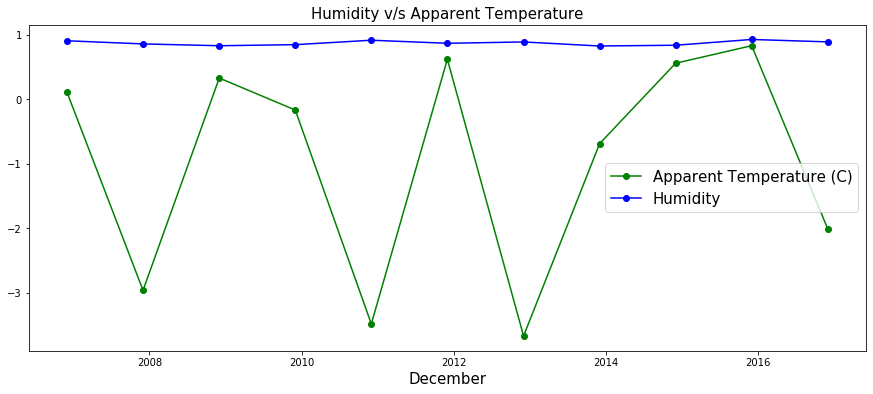

In [670]:
#DECEMBER

dec = data[data.index.month==12]
plt.figure(figsize=(15,6))
plt.plot(dec.loc['2006-12-01':'2016-12-01', 'Apparent Temperature (C)'], 
         marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'green');
plt.plot(dec.loc['2006-12-01':'2016-12-01', 'Humidity'], 
         marker='o', linestyle='-',label='Humidity',color = 'blue');
plt.legend(loc = 'center right',fontsize = 15);
plt.xlabel('December', fontsize = 15);
plt.title('Humidity v/s Apparent Temperature',fontsize = 15)

Anlaysis : 

From the month of April to the month of August there is a slight change in temperature but nearly no change in humidity for the 10 years(2006-2010) . Whereas for the month from September to the month of March there is a vast change in the temperature but again humidity remains unchanged.